## Overview of three popular clustering algorithms in Python and R

### A few words

There are already multiple excellent notebooks that give an introduction to clustering and discuss the different clustering algorithms that are used in data science. But in this notebook, I aim to provide a quick overview of the three most popular clustering algorithms using Python 3 and recreate that clustering algorithm to R. I will be using the python scikit learn and SciPy libraries for the clustering algorithms. 

Although there are many supervised and unsupervised clustering algorithms, for this notebook I will be discussing the three most popular unsupervised clustering algorithms. They are as follows:
#### 1. K-Means Clustering
A very popular clustering algorithm, we start by choosing the number of clusters k. We then randomly choose initial cluster centres (also known as centroids) u. Next, for each data point, we find the nearest centroid and assign that data point to the centroid. We then calculate the new centroid by averaging all the data points in the cluster. We then repeat this until all the cluster centroids converge.

#### 2. Hierarchical Clustering
As the name suggests, hierarchical clustering aims to build a hierarchy of clusters by top down (divisive) or down up (agglomerative) approach. Focusing on agglomerative cluster method, we first assign each data point to its own cluster. We then compute similarities (such as the Euclidean distance) between each of the clusters and join the most similar ones. Next we repeat this until there is only a single cluster left.

#### 3. Density-Based Spatial Clustering of Applications with Noise
Commonly known as DBSAN, it encompasses the idea that a cluster is defined as a minimal set of density connected points. This algorithm generally takes two input values; a neighbourhood value that is used to set the cut off distance for similarities and a minimum points parameter that defines the value at which a neighbourhood of points is considered to be dense.

### Data Set
For our data sets, we will be using a standard simple data two-dimensional data set containing five blobs, and a standard complicated geometric data set. For both data sets, I have intentionally left out the labels (usually denoted as y) out of the visuals since we will be using unsupervised algorithms to cluster the data sets.

#### Simple Data Set


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

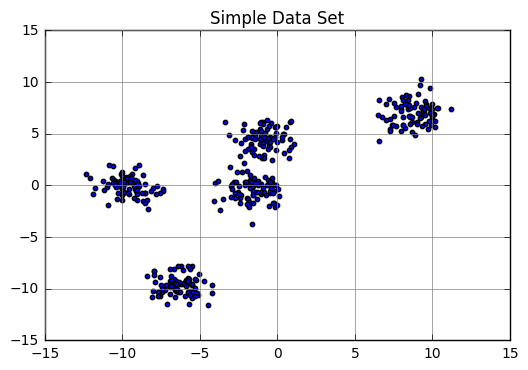

In [2]:
from sklearn.datasets.samples_generator import make_blobs
simple_X,simple_y= make_blobs(n_samples=400,centers=5,random_state=11)
plt.scatter(simple_X[:,0],simple_X[:,1],s=10)
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.title("Simple Data Set")
plt.show()

#### Complicated Data Set

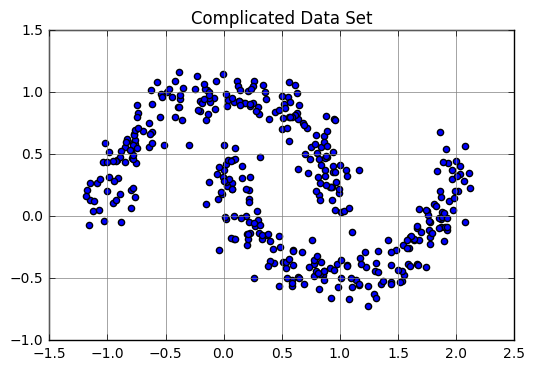

In [3]:
from sklearn.datasets import make_moons
compl_X,compl_y = make_moons(400, noise=0.11)
plt.scatter(compl_X[:,0],compl_X[:,1])
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.title("Complicated Data Set")
plt.show()

### K-Means Clustering

#### Python

In [4]:
simple_kmeans = KMeans(n_clusters=5,random_state=0) # Initiating the model
simple_kmeans.fit(simple_X) # Fitting the model
simple_kmeans_pred = simple_kmeans.predict(simple_X) # Predicting from the model

Note that for K-Means clustering, we need to set the number of clusters prior to modelling.

Let’s now plot the predicted clusters and compare that to the original clustering.

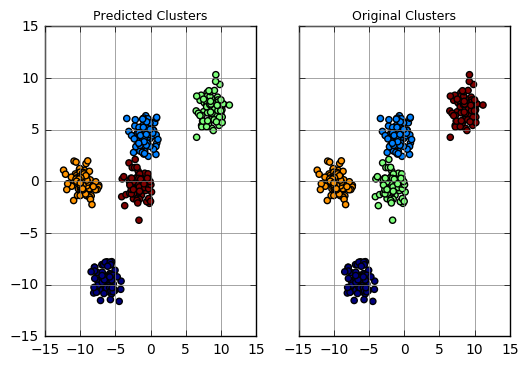

In [5]:
f, (fig1, fig2) = plt.subplots(1, 2, sharey=True)
fig1.scatter(simple_X[:,0],simple_X[:,1],c=simple_kmeans_pred)
fig1.grid(b=True, which='major', color='grey', linestyle='-')
fig1.set_title("Predicted Clusters",fontsize=9)

fig2.scatter(simple_X[:,0],simple_X[:,1],c=simple_y)
fig2.grid(b=True, which='major', color='grey', linestyle='-')
fig2.set_title("Original Clusters",fontsize=9)
plt.show()

Excellent clustering - we see that our clustering algorithm is perfect for the simple data set. Now let’s try this in R:

#### R

NOTE: To use R in the notebook we need to install and import rpy2. More information about using R and Python code in a single Jupyter notebook can be found [here](https://rpy2.readthedocs.io/en/version_2.8.x/overview.html#installation). It can be a little tricky to setup a notebook that can use both languages, so feel free to contact me if you need any help.

In [6]:
import rpy2.ipython 
%load_ext rpy2.ipython 
%R -i simple_X -i simple_y -i compl_X -i compl_y # Loading the simple and complex data sets so they can be accessible in R

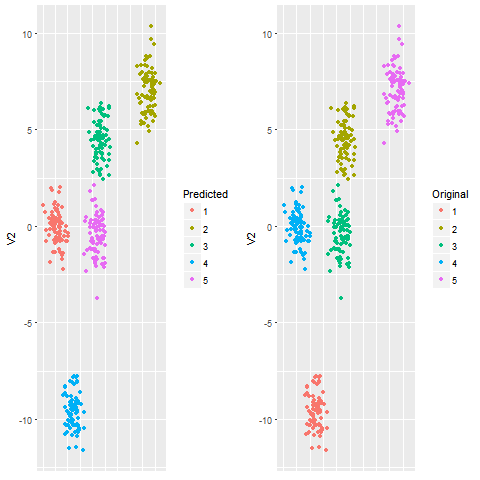

In [14]:
%R set.seed(20) # Setting the seed so we can get random but reproducible result
%R library(ggplot2) # Loading library for plotting
%R require(gridExtra) # Loading library for further plotting
%R simpledf = as.data.frame(simple_X) # Creating a data frame from the simple_X data set
%R rsimplekmeans = kmeans(simpledf, centers = 5,iter.max=1000) # Modeling the dataframe
%R simpledf$Original = as.factor(simple_y+1) # Adding the labels (as a factor) to the data set 
%R simpledf$Predicted = as.factor(rsimplekmeans$cluster) # Adding the predicted labels (as a factor) to the data set 
%R fig1 = ggplot(simpledf, aes(x=V1, y=V2, color=Predicted)) + geom_point() + theme(axis.title.x=element_blank(), axis.text.x=element_blank(),axis.ticks.x=element_blank())
%R fig2 = ggplot(simpledf, aes(x=V1, y=V2, color=Original)) + geom_point() +  theme(axis.title.x=element_blank(), axis.text.x=element_blank(),axis.ticks.x=element_blank())
%R grid.arrange(fig1, fig2, ncol=2);

Excellent K-Means clustering! Let’s now cluster the data points from the complicated geometry data set.

We'll start with Python and then go through the same process with R
#### Python

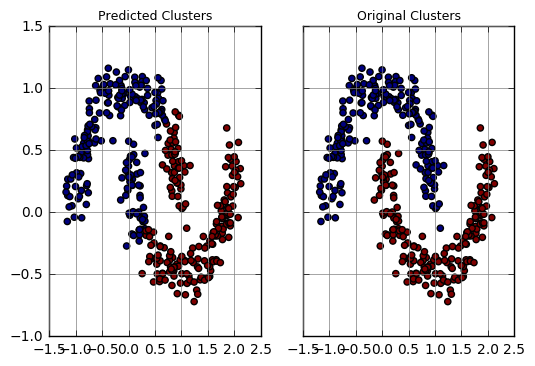

In [44]:
comp_kmeans = KMeans(n_clusters=2,random_state=0)
comp_kmeans.fit(compl_X)
comp_kmeans_pred = comp_kmeans.predict(compl_X)
f, (fig1, fig2) = plt.subplots(1, 2, sharey=True)
fig1.scatter(compl_X[:,0],compl_X[:,1],c=comp_kmeans_pred)
fig1.grid(b=True, which='major', color='grey', linestyle='-')
fig1.set_title("Predicted Clusters",fontsize=9)
fig2.scatter(compl_X[:,0],compl_X[:,1],c=compl_y)
fig2.grid(b=True, which='major', color='grey', linestyle='-')
fig2.set_title("Original Clusters",fontsize=9)
plt.show()

As you can see, K-Means is limited if the clusters have complicated geometries. 
Specifically, the algorithm seems to group the data set diagonally into two clusters. I have shown this with a yellow diagonal line below.

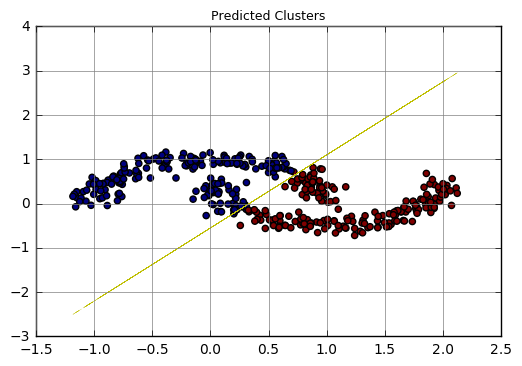

In [94]:
plt.scatter(compl_X[:,0],compl_X[:,1],c=comp_kmeans_pred)
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.title("Predicted Clusters",fontsize=9)
diagline_val = [1.65*i - 0.55 for i in compl_X[:,0]]
plt.plot(compl_X[:,0], diagline_val,linestyle='--', linewidth=0.2,color="y")
plt.show()

The reason for this is because K-Means produces a Voronoi diagram (kind of like borders) to classify the data. 
Also in other words, the decision boundary for whether a data set lies in which cluster is linear and therefore K-Means algorithm becomes ineffective in certain circumstances - such as this complicated data set.

Just to convince ourselves that K-Means is not the best choice of algorithm in this case, let’s try to cluster the complicated data set in R.

#### R

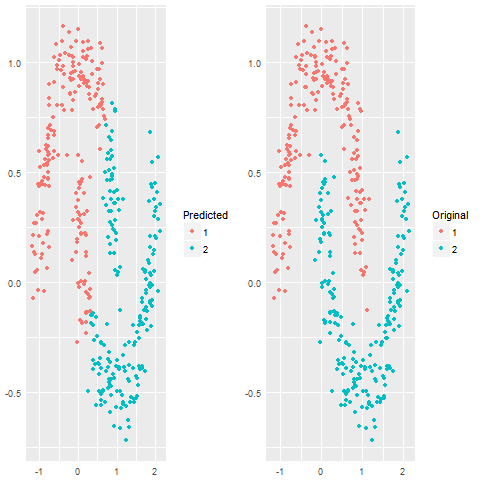

In [95]:
%R set.seed(20)
%R compldf = as.data.frame(compl_X)
%R rcomplkmeans = kmeans(compldf, centers = 2,iter.max=1000)
%R compldf$Original = as.factor(compl_y+1)
%R compldf$Predicted = as.factor(rcomplkmeans$cluster)
%R fig1 = ggplot(data = compldf, aes(x=V1, y=V2, color=Predicted)) + geom_point() + theme(axis.title.x=element_blank(),axis.ticks.x=element_blank(),axis.title.y=element_blank(),axis.ticks.y=element_blank())
%R fig2 = ggplot(data = compldf, aes(x=V1, y=V2, color=Original)) + geom_point() +  theme(axis.title.x=element_blank(),axis.ticks.x=element_blank(),axis.title.y=element_blank(),axis.ticks.y=element_blank())
%R grid.arrange(fig1, fig2, ncol=2);

Once again we observe and confirm the same conclusion - our data set is clustered diagonally.

Now let’s apply Hierarchical clustering to the complicated data set and see if it does any better than K-Means.

### Hierarchical Clustering

#### Python

Although we can use the scikit learn library to perform Hierarchical clustering, I've decided to use the SciPy library for the sole reason that it allows me to plot the dendrogram.

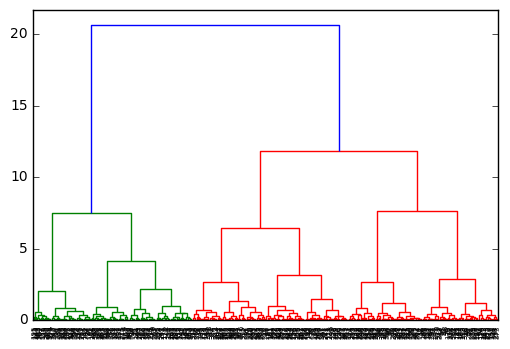

In [171]:
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(compl_X, 'ward') # Creates the linkage matrix using standard euclidean metric
plt.figure()
hierarchy.dendrogram(hcluster)
plt.show()

If you are familiar with Hierarchical clustering, you'll realise that the above dendrogram suggests that the best cut-off (i.e. determining the number of clusters) is around 17, providing us with two clusters. 

A bit of a reminder about dendrograms; as a rule, we choose a cut-off at a level that maximises the distance between the lower and upper boundaries in the dendrogram. However choosing the cut-off is mostly an exploratory approach and is all dependent on your data set. In this case, a cut-off of 17 is best choice for our data set. Now let’s plot the clusters.

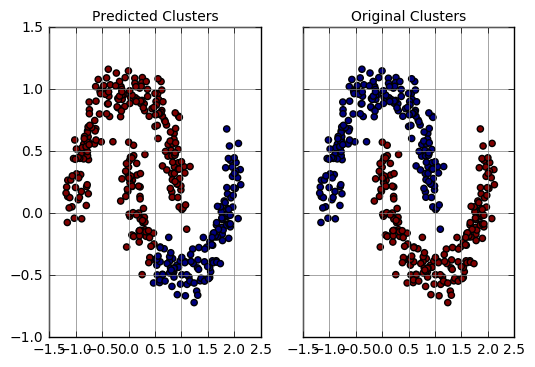

In [174]:
from scipy.cluster.hierarchy import fcluster
hclustering_pred = fcluster(linkage_matrix,15,criterion='distance')

f, (fig1, fig2) = plt.subplots(1, 2, sharey=True)
fig1.scatter(compl_X[:,0],compl_X[:,1],c=hclustering_pred)
fig1.grid(b=True, which='major', color='grey', linestyle='-')
fig1.set_title("Predicted Clusters",fontsize=10)

fig2.scatter(compl_X[:,0],compl_X[:,1],c=compl_y)
fig2.grid(b=True, which='major', color='grey', linestyle='-')
fig2.set_title("Original Clusters",fontsize=10)
plt.show()

Interestingly, the result is similar to that of K-Means apart from the fact that the discussed diagonal line that separates the two clusters has appeared to move down.

The reason for the wrong clustering is related to the method used to create such clusters. The linkage "ward" method used here, attempts to minimise the sum of squared differences in each cluster in a way that is similar to K-Means. Even if we were to use other linkage methods such as minimising the average distance or minimising the maximum distance between pairs of clustering would still yield the same result.

However, one way to address this is to impose what’s known as connectivity boundaries for which Hierarchical clustering allows for (but we will not dive into). In a nutshell, these connectivity boundaries allows us to specify that only adjacent data points can be merged together and therefore eliminating any merging between "disconnected" clusters. 

Let’s attempt the same Hierarchical clustering in R

#### R

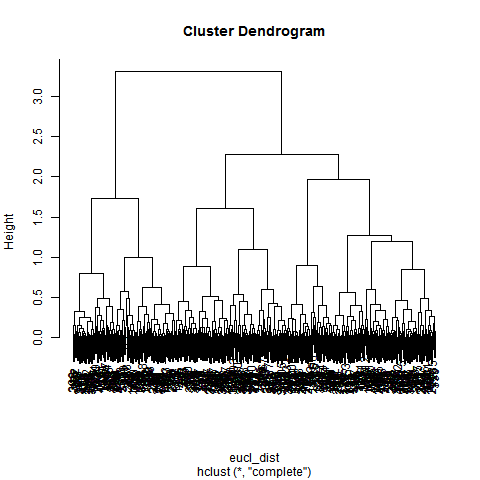

In [175]:
%R require(graphics)
%R rm(compldf)
%R compldf = as.data.frame(compl_X)
%R eucl_dist = dist(compldf) # Calculating the euclidean distance
%R hcluster = hclust(eucl_dist)
%R plot(hcluster)

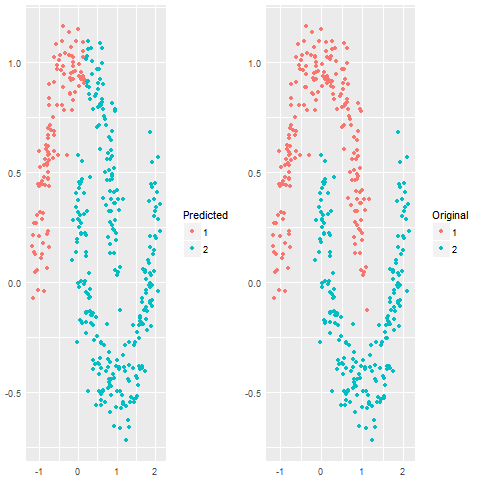

In [187]:
%R hclustering = cutree(hcluster,2)
%R compldf$Predicted = as.factor(hclustering)
%R compldf$Original = as.factor(compl_y+1)
%R fig1 = ggplot(data = compldf, aes(x=V1, y=V2, color=Predicted)) + geom_point() + theme(axis.title.x=element_blank(),axis.ticks.x=element_blank(),axis.title.y=element_blank(),axis.ticks.y=element_blank())
%R fig2 = ggplot(data = compldf, aes(x=V1, y=V2, color=Original)) + geom_point() +  theme(axis.title.x=element_blank(),axis.ticks.x=element_blank(),axis.title.y=element_blank(),axis.ticks.y=element_blank())
%R grid.arrange(fig1, fig2, ncol=2);

Here we see the same results as the python clustering.


### To be continiued...

In [188]:
# FYI: Hierarchical Clustering in sklearn

from sklearn.cluster import AgglomerativeClustering
hcluster = AgglomerativeClustering(linkage = "ward",n_clusters=2)
hcluster.fit(compl_X)
hcluster_pred = hcluster.fit_predict(compl_X)

f, (fig1, fig2) = plt.subplots(1, 2, sharey=True)
fig1.scatter(compl_X[:,0],compl_X[:,1],c=hcluster_pred)
fig1.grid(b=True, which='major', color='grey', linestyle='-')
fig1.set_title("Predicted Clusters",fontsize=10)

fig2.scatter(compl_X[:,0],compl_X[:,1],c=compl_y)
fig2.grid(b=True, which='major', color='grey', linestyle='-')
fig2.set_title("Original Clusters",fontsize=10)